In [11]:
import pandas as pd

df = pd.read_csv("marketing_campaign_data.csv")
df.head()

,user_id,event_date,campaign_id,channel,impressions,clicks,conversions,revenue,cost,age,region,signup_date
0,U0655,2025-02-27,CMP001,Ads,601,12,0,0.0000,2.8900,26,North,2023-04-07
1,U0759,2025-02-14,CMP010,Social,161,1,1,5.6600,0.4000,31,South,2023-09-16
2,U0617,2025-01-14,CMP009,Email,1430,41,1,45.8200,1.6400,52,West,2024-06-03
3,U0460,2025-05-23,CMP001,Ads,426,5,0,0.0000,2.0900,45,East,2024-08-12
4,U0160,2025-04-21,CMP006,Email,878,33,1,4.1300,1.1200,40,East,2023-08-12


In [12]:

df.info()


df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      1000 non-null   object 
 1   event_date   1000 non-null   object 
 2   campaign_id  1000 non-null   object 
 3   channel      1000 non-null   object 
 4   impressions  1000 non-null   int64  
 5   clicks       1000 non-null   int64  
 6   conversions  1000 non-null   int64  
 7   revenue      1000 non-null   float64
 8   cost         1000 non-null   float64
 9   age          1000 non-null   int64  
 10  region       1000 non-null   object 
 11  signup_date  1000 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 93.9+ KB


,impressions,clicks,conversions,revenue,cost,age
count,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
mean,1069.6790,24.1270,1.0090,21.2273,3.2506,42.2740
std,546.0089,18.5147,1.7017,42.4831,2.8189,13.8026
min,100.0000,0.0000,0.0000,0.0000,0.0600,18.0000
25%,596.7500,10.0000,0.0000,0.0000,1.0775,30.0000
50%,1066.0000,21.0000,0.0000,0.0000,2.2600,43.0000
75%,1543.0000,33.0000,1.0000,23.9925,4.6500,54.0000
max,1999.0000,131.0000,16.0000,382.9500,12.8800,65.0000


In [13]:
# CTR по каналам
ctr_by_channel = df.groupby("channel")[["impressions", "clicks"]].sum()
ctr_by_channel["CTR"] = ctr_by_channel["clicks"] / ctr_by_channel["impressions"] * 100
ctr_by_channel

# ROI по кампаниям
roi_by_campaign = df.groupby("campaign_id")[["revenue", "cost"]].sum()
roi_by_campaign["ROI"] = (roi_by_campaign["revenue"] - roi_by_campaign["cost"]) / roi_by_campaign["cost"] * 100
roi_by_campaign



,revenue,cost,ROI
campaign_id,,,
CMP001,2406.2100,310.4800,674.9968
CMP002,2378.5100,387.2800,514.1577
CMP003,2789.5400,314.2900,787.5688
CMP004,2323.2700,337.4900,588.3967
CMP005,1789.9400,288.5400,520.3438
CMP006,1670.0000,352.7000,373.4902
CMP007,2431.5300,359.7500,575.8944
CMP008,1396.5200,272.3500,412.7667
CMP009,1583.9000,314.9800,402.8573


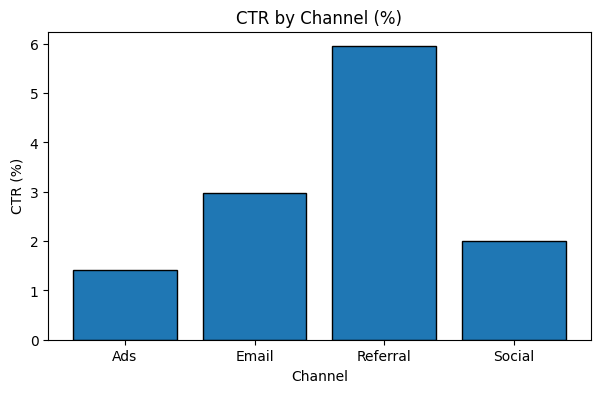

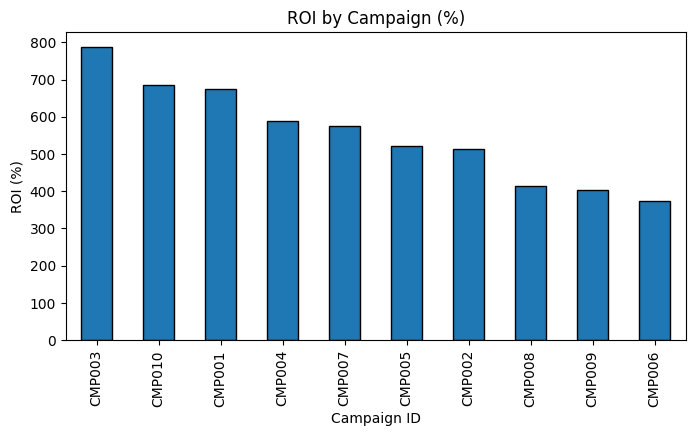

In [14]:
import matplotlib.pyplot as plt

# CTR
plt.figure(figsize=(7,4))
plt.bar(ctr_by_channel.index, ctr_by_channel["CTR"], edgecolor="black")
plt.title("CTR by Channel (%)")
plt.xlabel("Channel")
plt.ylabel("CTR (%)")
plt.show()

# ROI
plt.figure(figsize=(8,4))
roi_by_campaign["ROI"].sort_values(ascending=False).plot(kind="bar", edgecolor="black")
plt.title("ROI by Campaign (%)")
plt.xlabel("Campaign ID")
plt.ylabel("ROI (%)")
plt.show()
